# PCA - Word embedding BERT

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D.pkl".format(TARGET_DATASET))
df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
0,-2.855047,-10.375413,101.0,10000.0,30000.0,40000.0,-0.500000
1,-3.565986,-0.898380,10166.0,93.0,114.0,207.0,-0.101449
2,9.985498,1.493686,19387.0,2146.0,9544.0,11690.0,-0.632849
3,1.403732,14.940429,16099.0,2.0,0.0,2.0,1.000000
4,22.539894,-11.893715,8202.0,24.0,55.0,79.0,-0.392405
...,...,...,...,...,...,...,...
18805,5.562513,13.013296,26701.0,0.0,1.0,1.0,-1.000000
18806,-9.955718,-4.970077,29313.0,0.0,1.0,1.0,-1.000000
18807,-12.059887,2.280708,9141.0,0.0,1.0,1.0,-1.000000
18808,-3.245529,15.275799,17411.0,0.0,1.0,1.0,-1.000000


### Keep rows which occurence is above mean value

In [2]:
df = df[df['#']>df['#'].mean()]
df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
0,-2.855047,-10.375413,101.0,10000.0,30000.0,40000.0,-0.500000
1,-3.565986,-0.898380,10166.0,93.0,114.0,207.0,-0.101449
2,9.985498,1.493686,19387.0,2146.0,9544.0,11690.0,-0.632849
4,22.539894,-11.893715,8202.0,24.0,55.0,79.0,-0.392405
5,20.961819,-10.928490,3240.0,31.0,91.0,122.0,-0.491803
...,...,...,...,...,...,...,...
14984,-14.889073,-3.446981,5347.0,0.0,52.0,52.0,-1.000000
15067,12.231753,7.551378,19369.0,0.0,53.0,53.0,-1.000000
16377,11.083803,12.498448,22819.0,0.0,118.0,118.0,-1.000000
16384,4.010854,-2.976672,13001.0,0.0,59.0,59.0,-1.000000


### Occurence histogram

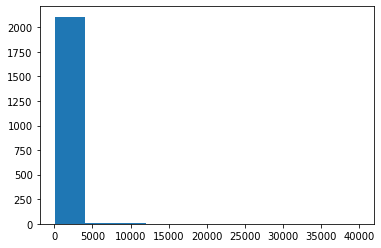

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['#'])
plt.show()

### Plot principal components

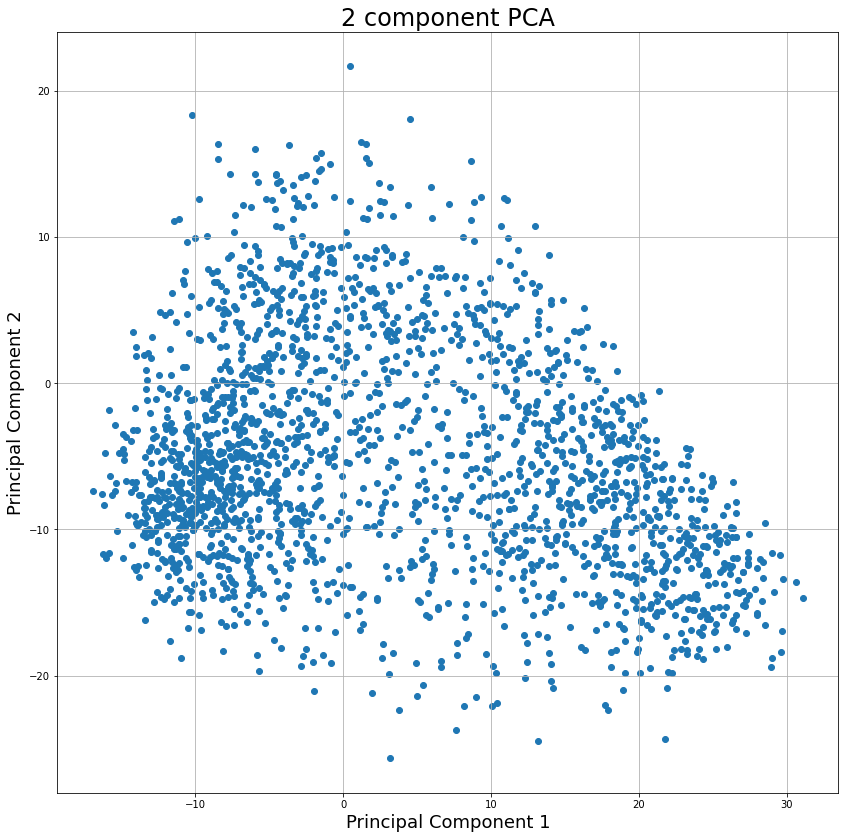

In [4]:
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(df["principal component 1"], df["principal component 2"])
ax.grid()

### Most discriminating ironic words

In [5]:
ironic_df = df.sort_values(by=['coefficient'], ascending=False)
ironic_df = ironic_df[ironic_df['coefficient'] > 0]
ironic_df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
10,-2.552801,-5.616224,19728.0,3572.0,20.0,3592.0,0.988864
1769,14.361077,-12.450914,9711.0,51.0,2.0,53.0,0.924528
488,-7.901465,-7.500471,19313.0,104.0,8.0,112.0,0.857143
1114,-5.500637,-3.740640,20954.0,63.0,10.0,73.0,0.726027
325,-11.066472,-10.974324,3666.0,141.0,47.0,188.0,0.500000
...,...,...,...,...,...,...,...
126,2.990130,3.250175,5653.0,39.0,38.0,77.0,0.012987
2969,-11.701909,-5.120001,3116.0,42.0,41.0,83.0,0.012048
635,-8.374843,-13.179774,3849.0,49.0,48.0,97.0,0.010309
55,-8.340305,-8.367036,2021.0,691.0,681.0,1372.0,0.007289


### Most discriminating non ironic words

In [6]:
nonironic_df = df.sort_values(by=['coefficient'], ascending=True)
nonironic_df = nonironic_df[nonironic_df['coefficient'] < 0]
nonironic_df

,principal component 1,principal component 2,idx,#+,#-,#,coefficient
17682,-7.640195,14.315538,4883.0,0.0,71.0,71.0,-1.000000
16377,11.083803,12.498448,22819.0,0.0,118.0,118.0,-1.000000
15067,12.231753,7.551378,19369.0,0.0,53.0,53.0,-1.000000
14984,-14.889073,-3.446981,5347.0,0.0,52.0,52.0,-1.000000
14924,-4.892798,-0.067414,26577.0,0.0,127.0,127.0,-1.000000
...,...,...,...,...,...,...,...
3931,13.166555,4.420663,19739.0,28.0,29.0,57.0,-0.017544
2682,-9.919100,-4.035137,3696.0,58.0,60.0,118.0,-0.016949
2408,-6.627930,-8.916285,3374.0,40.0,41.0,81.0,-0.012346
562,-13.358565,-9.561859,2667.0,80.0,82.0,162.0,-0.012346


### Plot principal components: ironic vs non ironic¶

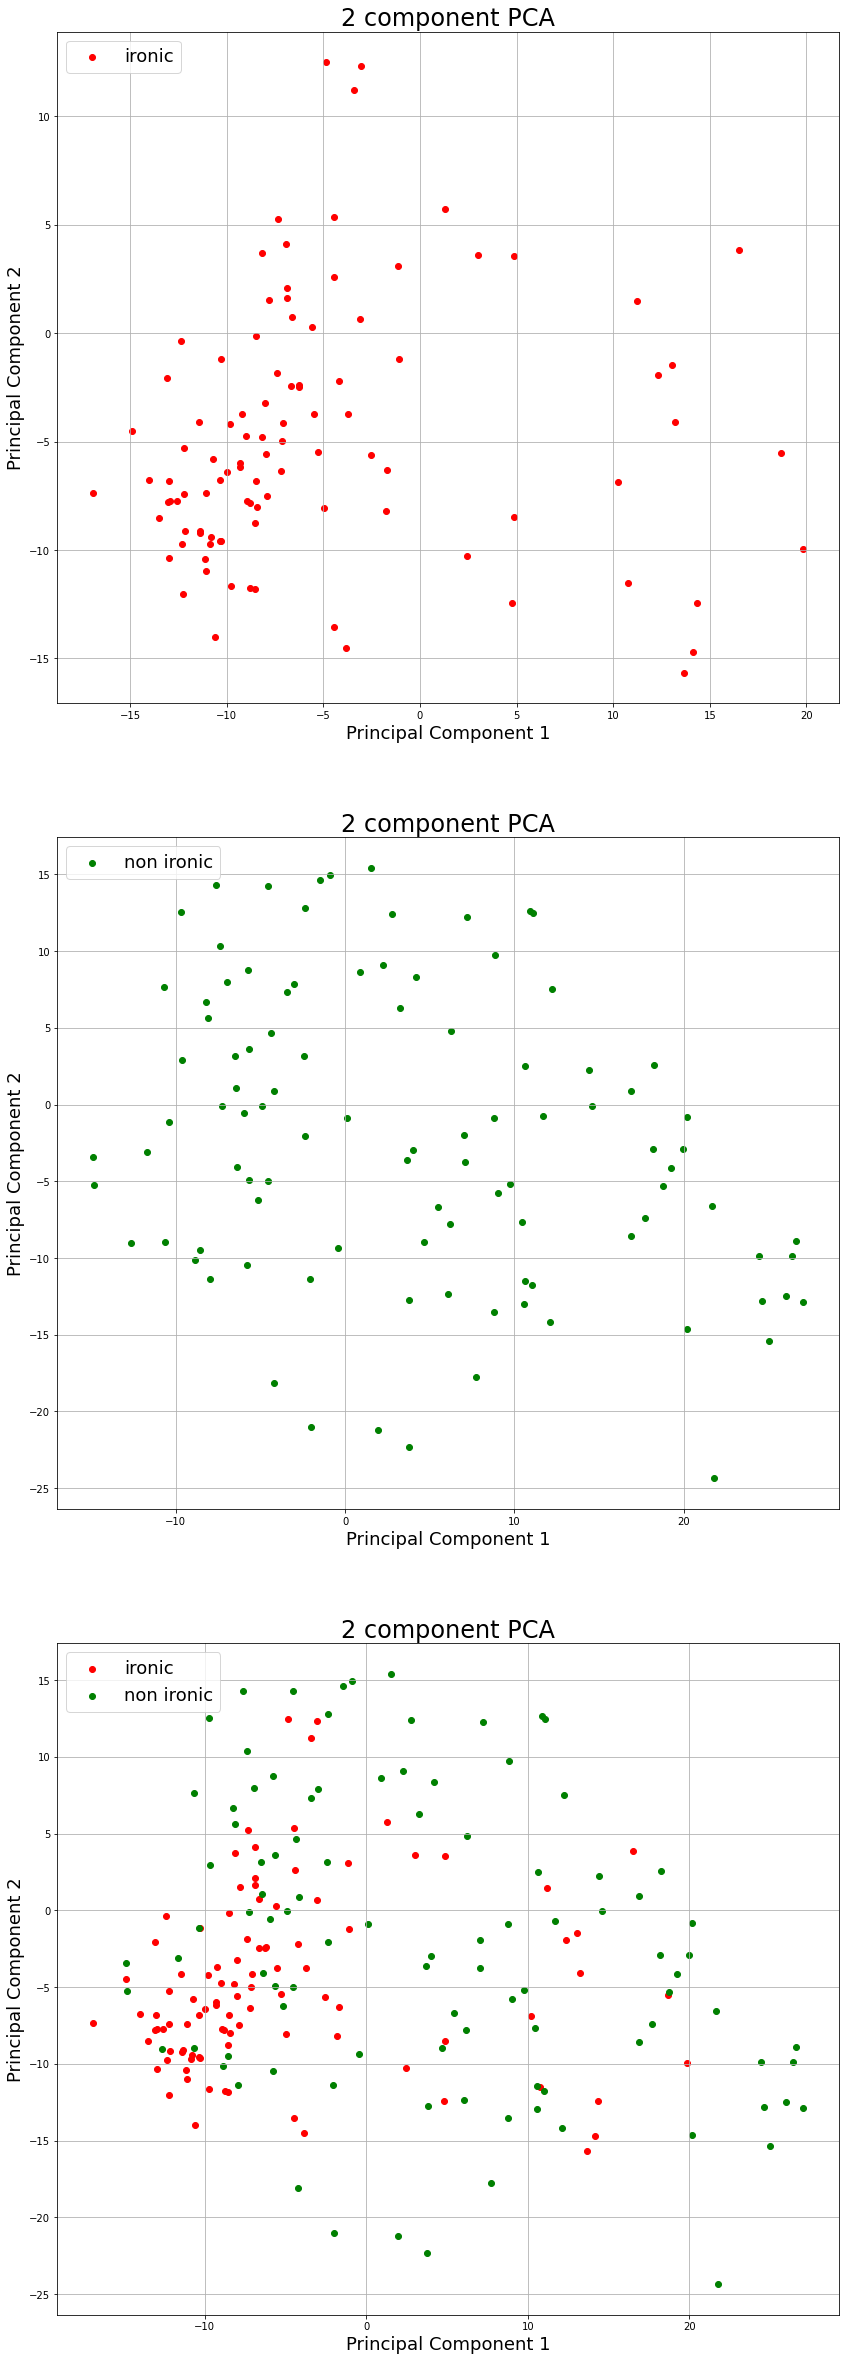

In [7]:
TOP_VALUE = 100
ironic_df = ironic_df.head(TOP_VALUE)
nonironic_df = nonironic_df.head(TOP_VALUE)

# Plot value
fig = plt.figure(figsize = (14, 14*3))

# Ironic
ax = fig.add_subplot(3,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Non ironic
ax = fig.add_subplot(3,1,2)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

# Both
ax = fig.add_subplot(3,1,3)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
ax.scatter(ironic_df["principal component 1"], ironic_df["principal component 2"], c='r', label='ironic')
ax.scatter(nonironic_df["principal component 1"], nonironic_df["principal component 2"], c='g', label='non ironic')
ax.grid()
plt.legend(loc='upper left', fontsize = 18);

plt.show()